#  Почему NumPy?

Какую коллекцию мы чаще всего использовали в предыдущем семестре? - `List()`. Вспомним кличевые особенности:
* упорядоченность
* доступ по индексу
* динамический размер
* нет ограничения на тип хранимых данных

Для выполнения математических вычислений нам обычно не требуется хранить РАЗНЫЕ типы данных, а только числовые. Обычно речь идёт о векторах и матрицах, к которым вы уже должны были привыкнуть.
Тогда встаёт закономерный вопрос: как работать с этими структурами данных и как их хранить?

_Вариант №1_: вектора хранить как списки, а матрицы - как списки списков.

Перечислим недостатки этого подхода: 
1) Метод `list.append()` излишен, т.к. математические пространства, обычно не меняют своей размерности. Например, был у нас вектор $\vec{v} \in L^2$, который мы хранили списком:
```{python}
v = [1,2]

# и где-то случано сделали append
v.append(4)
```
В таком случае запись $\vec{v} \in L^2$ будет не верна. __Другими словами: вектор в линейном пространстве не умеет сам по себе трансформироваться в вектор другого линейного пространства.__

2) Необходимо следить за соблюдением размерности матриц, чтобы все строки и столбцы имели одинаковый размер. Это может быть особенно важно, если на разных строках матрицы хранятся числа разных порядков:
```{python}
m = [
[121, 10032, 23432, 433, 23324, 1223123, 1212, 10000, 87665, 223],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
```

3) Сложность программирования матричных и векторных операций. `List` сам по себе их не поддерживает, т.к. у него другая философия. Поэтому, чтобы сложить два вектора $\vec{x} + \vec{y}$, нам придётся написать что-то такое:
```{python}
z = [x_ + y_ for x_, y_ in zip(x, y)]
```
С матрицами дело обстоит ещё сложнее.


На прошлом занятии вы должны были попытаться реализовать такой контейнер, моделирующий работу одномерного вектора `Array1d`. Строго говоря, никто не мешает нам реализовать аналогичный класс для матриц, например `Array2d`. А потом можно замахнуться и на n-мерные тензора. Но вы уже должны представить, как сложно будет это реализовать, а потом ещё и расширить функционал, для решения систем уравнений, для моделирования процессов, для решения задач мат.статистики и др.

К тому же есть ещё один существенный недостаток, который мы пока не озвучили:

4) Скорость работы - все перечисленные нами операции выполняются последовательно и нерационально с точки зрения потребления вычислительных ресурсов. На следующих курсах будет уделено особое внимание тому, как можно распараллеливать выполнение векторных и матричных операций, ускоряя вычисления в десятки раз. Позже приведём пример.

Думаю, этого будет достаточно, чтобы сделать вывод, что такой варинат хранения векторов и матриц нам не подходит. 

Специально для решения таких задач существует библиотека с открытым исходным кодом `numpy` (Numerical Python). Она не входит в список стандартных пакет `Python`, но ставится с помощью установщика пакетов `pip`, и поставляется вместе с пакетом программ Anaconda. Для данной библиотеки существует общеприянтое сокращение `np`, поэтому большинство ваших программ будет начинаться со строчки:
```{Python}
import numpy as np
```

Основные приемущества этой библиотеки:
1. Простота работы с многоразмерными матрицами и тензорами
2. Скорость работы благодаря оптимизации и распараллеливанию на уровне языка C
3. Интеграция с другими библиотеками: SciPy и Matplotlib, о которых мы поговорим позже.

В течение следующих лет на разных курсах вам нужно будет производить научные вычисления разного рода, поэтому советую не пропускать занятия. Также библиотека `numpy` является отправной точкой для практического изучения Машинного Обучения. Поэтому, если вы в дальнейшем захотите углубиться в эту тему, то вам также потребуется освоить `numpy`.

На этом вводная часть заканчивается.

# Numpy - массивы

Центральная структура данных в `NumPy` - это массивы. Массивы в `numpy` могут иметь 1, 2 и больше размерностей, поэтому тип данных называется соответсвующе: `ndarray`.
В отличие от `List`-ов в `Python` - нумпаевские массивы являются массивами в прямом смысле этого слова.

__Определение__ : __Массив__ — это ***упорядоченный набор однотипных элементов***.

Запомните это определение! Списки в `Python` массивами в прямом смысле этого слова не являются.

Для начала мы научимся создавать `numpy`-массивы.

## Созданием массивов

Создадим наш первый массив.

In [1]:
import numpy as np
arr = np.array([1, 2, 3, 4, 5, 6])

In [2]:
# произведём классические исследования
print(type(arr))    # numpy.ndarray
# help(arr)           # много информации про поля и методы
print(arr.shape)    # (6) - shape - это кортеж размерностей!

<class 'numpy.ndarray'>
(6,)


In [3]:
# есть доступ по индексу:
print(arr[0], arr[2], arr[-1]) # 1 3 6
arr[3] = 44
print(arr)          # [1, 2, 3, 44, 5, 6]

1 3 6
[ 1  2  3 44  5  6]


In [4]:
# чтобы создать матрицу, нужно в конструктор
# подать список списков
mat = np.array([[3, 2, 1, 0], [4, 5, 6, 7]])
print(mat.shape)    # (2, 4): 2 строки, 4 столбца
print(mat)          # красиво напечатается матрица

(2, 4)
[[3 2 1 0]
 [4 5 6 7]]


In [5]:
# для доступа к элементу можно указывать 
# индексы в одной паре квадратных скобок
print(mat[1, 2])    # 6
mat[0, 0] = 30
print(mat[0])       # первая строчка матрицы: [30, 2, 1, 0]

6
[30  2  1  0]


Т.е. на первый взгляд `numpy`-массивы предоставляют тот же функционал, что и `List`-ы.  

Часто будут возникать ситуации, когда вам нужно создать массив с особым заполнением:
* матрица нулей
* матрица единиц
* диагональная матрица
* массив случайных чисел
* просто пустой массив (чтобы заранее выделить память)

Для создания таких массив уже сущестуют встроенные функции

In [6]:
# нулевые массивы
zero1 = np.zeros(4)
print(zero1)

zero2 = np.zeros((4,4))
print(zero2)

[0. 0. 0. 0.]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [7]:
# нулевые массивы на основе уже имеющихся массивов
zero3 = np.zeros_like(arr)
print(zero3)

zero4 = np.zeros_like(mat)
print(zero4)

[0 0 0 0 0 0]
[[0 0 0 0]
 [0 0 0 0]]


In [8]:
# единичные массивы
one1 = np.ones(4)
print(one1)

one2 = np.ones((4,4))
print(one2)

[1. 1. 1. 1.]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [9]:
# единичные массивы на основе уже имеющихся массивов
one3 = np.ones_like(arr)
print(one3)

one4 = np.ones_like(mat)
print(one4)

[1 1 1 1 1 1]
[[1 1 1 1]
 [1 1 1 1]]


In [10]:
# диагольные матрицы
diag1 = np.diag(arr)
print(diag1)

[[ 1  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0  0 44  0  0]
 [ 0  0  0  0  5  0]
 [ 0  0  0  0  0  6]]


In [11]:
diag2 = np.eye(4)
print(diag2)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [12]:
diag3 = np.eye(4, k=1)
print(diag3)

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]]


In [13]:
diag4 = np.eye(4, k=-2)
print(diag4)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


In [14]:
# массивы случайных чисел
np.random.seed(12)    # зафиксируем параметр генератора псевдослучайных чисел

rarr = np.random.randint(low=-10, high=10, size=5)
rmat = np.random.randint(low=-10, high=10, size=(5,5))

print(rarr)
print(rmat)

[ 1 -4  7 -8 -7]
[[ -7   2   6   7  -5]
 [  3  -8   1   0 -10]
 [ -2   2   3   8  -7]
 [ -6  -7  -9 -10   8]
 [  8   6  -4   3  -1]]


In [15]:
# пустые массивы, заполненные мусорными значениями
emat = np.empty_like(mat)
print(emat)

[[22388640        0        0        0]
 [       0        0        0        0]]


In [26]:
# просто массив ариметической прогрессии
# работает как обычный range(start, stop. step)

print(np.arange(10))
print(np.arange(3, 13))
print(np.arange(3, 13, 3))

[0 1 2 3 4 5 6 7 8 9]
[ 3  4  5  6  7  8  9 10 11 12]
[ 3  6  9 12]


In [29]:
# бывают ситуации, когда нам нужен массив значений ОТ и ДО
np.linspace(start=-1, stop=1, num=5)

array([-1. , -0.5,  0. ,  0.5,  1. ])

## Индексация в массивах

### Срезы
Аналогично питоновским `List`-ам здесь можно создавать срезы. Только нужно иметь ввиду, что массив имеет несколько размерностей:

In [98]:
m = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(m)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [100]:
# первый индекс - строки
# второй - столбцы
m1 = m[:2, 1:3]
print(m1)

[[2 3]
 [6 7]]


In [102]:
# внутри m1 уже своя индексация - это полноценный массив
print(m1[0, 0])

2


In [104]:
# однако для оптимизции numpy не выделяет новую память,
# поэтому будьте аккуратны, изменяя срезы
m1[0, 0] = 20
print(m)

[[ 1 20  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


### Смешанная индексация

В рамках порождения подматриц можно совмещать обращения по срезам и обращения по индексам

In [105]:
m2 = m[1, 2:]
print(m2)

[7 8]


### Списковая индексация

По индексу вы можете получить не один, а сразу несколько элементов

In [113]:
arr = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
arr

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [114]:
# получим несколько строк в нужном нам порядке
print(arr[[2, 0]])

[[7 8 9]
 [1 2 3]]


In [115]:
# если нам просто нужно за раз взять несколько конкретных элементом,
# то используем два списка:
print(arr[[0, 3], [1, 1]]) # получу список из двух элементов

[ 2 11]


In [118]:
# создадим порядок индексов
b = [0, 2, 0, 1]

# и из каждой строчки возьмём именно эти элементы:
print(arr[[0,1,2,3], b])

[ 1  6  7 11]


In [123]:
# а теперь ещё и изменим именно их:
arr[[0,1,2,3], b] += 10
arr

array([[11,  2,  3],
       [ 4,  5, 16],
       [17,  8,  9],
       [10, 21, 12]])

In [122]:
# или породим новую матрицу, с помощью среза
arr[:, b]

array([[ 1,  3,  1,  2],
       [ 4,  6,  4,  5],
       [ 7,  9,  7,  8],
       [10, 12, 10, 11]])

### Булевая индексация

`numpy`-массивы поддерживают групповые логические операции, порождая маски - массивы логических значений.

In [124]:
arr  = np.array([[1,2], [3, 4], [5, 6]])
arr

array([[1, 2],
       [3, 4],
       [5, 6]])

In [125]:
# породим матрицу булевых значений,
# где True будет там, где выполняется некоторое условие

bool_mat = (arr > 2)
bool_mat

array([[False, False],
       [ True,  True],
       [ True,  True]])

In [126]:
# а теперь эту маску можно использовать как индекс
arr[bool_mat]

array([3, 4, 5, 6])

In [127]:
# однако нам совсем не обязательно создавать отдельную
# матрицу, а выделять нужные элементы сразу:
arr[arr > 2]

array([3, 4, 5, 6])

## Поле dtype

Любой нумпай-массив - это набор объектов ОДНОГО И ТОГО ЖЕ типа. Нумпа предостваляет самые разные типы данных, но обычно он старается угадать тип, при создании нового массива. Однако, всегда при создании массивы вы можете передать аргумент `dtype`, явно указав необходимый тип данных.

In [128]:
x = np.array([1, 2])   # Пусть numpy сам выберет тип данных
print(x.dtype)

int64


In [129]:
x = np.array([1.0, 2.0])   # Пусть numpy сам выберет тип данных
print(x.dtype)

float64


In [131]:
# пусть исходные данные будут разного типа
x = np.array([1.0, 2])   # Пусть numpy сам выберет тип данных
print(x.dtype)

float64


In [133]:
# а теперь явно укажем нужные тип
x = np.array([1, 2], dtype=np.float64)
print(x.dtype) 
x

float64


array([1., 2.])

## Математика массивов

Большинство базовых математических операций и функций уже перегружены для `numpy`-массивов и выполняются поэлементно. Причём можно использовать как и естественные операторы, так и специальные функции.

In [142]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)
print(x)
print(y)

[[1. 2.]
 [3. 4.]]
[[5. 6.]
 [7. 8.]]


In [137]:
print(np.add(x, y))
print(x + y)

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [138]:
print(np.subtract(x, y))
print(x - y)

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [146]:
# НЕ МАТРИЧНОЕ УМНОЖЕНИЕ !!!
print(np.multiply(x, y))
print(x * y)

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [147]:
print(np.divide(x, y))
print(x / y)

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [148]:
print(np.sqrt(x))
print(x ** 0.5)

[[1.         1.41421356]
 [1.73205081 2.        ]]
[[1.         1.41421356]
 [1.73205081 2.        ]]


### Правильные операции из линейной алгебры

In [149]:
# работа с матрицами
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)
print(x)
print(y)

[[1. 2.]
 [3. 4.]]
[[5. 6.]
 [7. 8.]]


In [152]:
# произведение матриц
print(np.dot(x, y))
print(x.dot(y))
print(x @ y)

[[19. 22.]
 [43. 50.]]
[[19. 22.]
 [43. 50.]]
[[19. 22.]
 [43. 50.]]


In [153]:
# работа с векторами
v = np.array([9,10])
w = np.array([11, 12])

In [156]:
# скалярное произведение векторов
print(v.dot(w))
print(np.dot(v, w))
print(v @ w)

219
219
219


In [158]:
# произведение матрицы на вектор
print(np.dot(x, v))
print(x @ v)

[29. 67.]
[29. 67.]


### Групповые математические операции

Нумпай очень эфективен в вопросе групповых операций, т.к. оптимизирует и распараллеливает их на уровне языка C

In [159]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


In [160]:
import numpy as np

x = np.array([[1,2], [3,4]])
print(x)    # Prints "[[1 2]
            #          [3 4]]"
print(x.T)  # Prints "[[1 3]
            #          [2 4]]"

# Note that taking the transpose of a rank 1 array does nothing:
v = np.array([1,2,3])
print(v)    # Prints "[1 2 3]"
print(v.T)  # Prints "[1 2 3]"

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]
[1 2 3]
[1 2 3]


## Бродкастинг (расширение)

__Бродкастинг или расширение__ - это механизм, позволяющий `numpy`-ю работать с массивамиразных размерностей при выполнении арифметических операций.  

Обычно у нас есть "большой" массив (например, матрица) и "маленький" (например, вектор или число), которой "расширяется" до размеров большого массива. Этот механиз позволяет векторизировать вычисления, оптимизируя их на уровне языка C как по памяти, так и по времени.  
Однако, нужно иметь ввиду, что идея бродкастинга не всегда является наиболее эффективной и может привести к неэффективному использованию памяти.

Как мы уже выяснили: когда массивы имеют одинаковые размеры, поэлементные операции выполняются естественным поэлементным путём:

In [85]:
a = np.array([1.0, 2.0, 3.0])
b = np.array([2.0, 2.0, 2.0])
a * b

array([2., 4., 6.])

Бродкастинг позволяет избежать создания подобного массива двоек. Простейший пример броадкастинга - это взаимодействие массива со скаляром:

In [86]:
a * 2

array([2., 4., 6.])

Результат идентичен предыдущему.  

Рассмотрим другой показательный пример.  
Пусть у нас есть матрица $\mathbf{x}$ и вектор $\vec{v}$, который нужно прибавить **к каждой строке матрицы $\mathbf{x}$**.

In [87]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])

print(x)
print(v)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[1 0 1]


In [88]:
%%time
# способ №1: создание соразмерной матрицы в цикле
y = np.empty_like(x)

for i in range(x.shape[0]):
    y[i, :] = v

x + y

CPU times: user 274 µs, sys: 16 µs, total: 290 µs
Wall time: 234 µs


array([[ 2,  2,  4],
       [ 5,  5,  7],
       [ 8,  8, 10],
       [11, 11, 13]])

Работает! Но...если бы матрица $\mathbf{x}$ была очень большой, то этот работал бы очень медлено. Однако можно оптимизировать создание матрицы $\mathbf{y}$:

In [89]:
%%time
# способ №2: создание соразмерной матрицы с помощью спец. метода
y = np.tile(v, (4,1))

x + y

CPU times: user 113 µs, sys: 7 µs, total: 120 µs
Wall time: 125 µs


array([[ 2,  2,  4],
       [ 5,  5,  7],
       [ 8,  8, 10],
       [11, 11, 13]])

Однако и здесь механиз бродкастинга может упростить нам жизнь, автоматически расширив "маленикий" вектор $\vec{v}$ до размеров "большой" матрицы $\mathbf{x}$:

In [90]:
%%time
x + v

CPU times: user 66 µs, sys: 4 µs, total: 70 µs
Wall time: 76.5 µs


array([[ 2,  2,  4],
       [ 5,  5,  7],
       [ 8,  8, 10],
       [11, 11, 13]])

### Главные правила бродкастинга

При работе с двумя массивами `NumPy` сравнивает их размерности - аттрибуты `shape`, начиная с конца (справа на лево). Размерности считаются *совместимыми*, если выполняется одно из условий:
* они равны
* одна из них равна 1  

Если ни одно из этих условий не выполняется, то генерируется исключение: `ValueError: operands could not be broadcast together`.  
Если у одного массива величина размерности равна 1, а у другого $n$, то первый массив "копируется" вдоль этой оси $n$ раз.

Добавим, что массивам необазательно иметь одинаковое число размерностей. Так в нашем предыдущем примере:

In [91]:
print(x.shape)
print(v.shape)

(4, 3)
(3,)


### Другие примеры бродкастинга

In [96]:
v = np.array([1, 2, 3])
w = np.array([4, 5])

In [98]:
# хотим умножить СТОЛБЕЦ на СТРОКУ, чтобы получить матрицу 3x2
v_column = v.reshape((v.shape[0], 1))
v_column * w

array([[ 4,  5],
       [ 8, 10],
       [12, 15]])

In [100]:
# соотношение размеров
print(v_column.shape)
print(w.shape)

(3, 1)
(2,)


In [101]:
x = np.array([[1,2,3], [4,5,6]])

# уже пройденный пример
x + v

array([[2, 4, 6],
       [5, 7, 9]])

In [103]:
# а теперь мы хотим прибывит w к каждому столбцу.
# 1 2 3  + 4  = 5 6  7
# 4 5 6    5    9 10 11

# способ №1 - reshape
w_column = w.reshape((w.shape[0], 1))
print(x + w_column)

print(w_column.shape) # массив "скопировался" 3 раза вдоль последней оси
print(x.shape)

[[ 5  6  7]
 [ 9 10 11]]
(2, 1)
(2, 3)


In [105]:
# способ 2: транспонировани
print((x.T + w).T)

print(w.shape)
print(x.T.shape)

[[ 5  6  7]
 [ 9 10 11]]
(2,)
(3, 2)


Больше информации по бродкастингу есть в [статье](https://numpy.org/doc/stable/user/basics.broadcasting.html) на официальном сайте `NumPy`

### Практический пример

Пусть нам дан некоторый фиксированный набор точек на плоскости: 

In [107]:
np.random.seed(19)
data_base = np.random.randint(140, 210, (5, 2))
data_base

array([[180, 159],
       [192, 171],
       [206, 196],
       [162, 174],
       [145, 150]])

Затем, к нам пришла некоторая новая точка, и для неё необходимо найти **ближайшую точку в бызе данных**

In [109]:
new_point = np.random.randint(140, 210, 2)
new_point

array([155, 179])

In [112]:
# решение, использующее бродкастинг
diffs = data_base - new_point
dists = np.sqrt(np.sum(diffs**2, axis=1))
closest_point_id = np.argmin(dists)
print(f"closets point is : {data_base[closest_point_id]}")

closets point is : [162 174]


(140.0, 210.0)

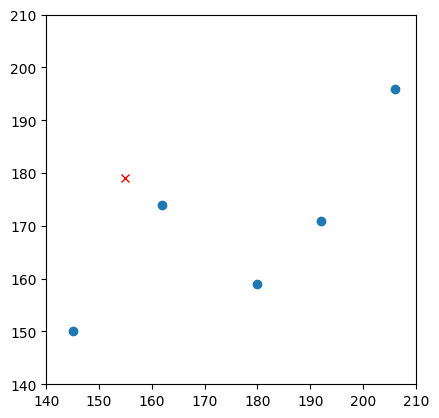

In [120]:
# продемонстрируем это
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.plot(data_base[:, 0], data_base[:, 1], "o")
ax.plot(new_point[0], new_point[1], "x", color="red")

ax.set_xlim([140, 210])
ax.set_ylim([140, 210])

Несмотря на кажующуся математическу абстрактность, этот пример в том или ином виде встречается и в анализе данных, и в машинном обучении (например, [алгоритмы кластеризации](https://education.yandex.ru/handbook/ml/article/klasterizaciya) или [KNN](https://habr.com/ru/articles/680004/))